In [1]:
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import pycountry
import pycountry_convert as pc
import numpy as np
import json
import matplotlib.pyplot as plt


In [7]:
ip_to_location = pd.read_csv('/home/kin672/gentb-summer22/Geography/ip_to_location.csv')
isolate_to_location = pd.read_csv('/home/kin672/gentb-summer22/Geography/ISOLATE_TO_LOCATION.csv')

In [8]:
def fix_dc(location):
    if 'Washington, D.C.' in str(location):
        location = location.replace('Washington, Washington, D.C.', 'Washington, D.C.')
    return(location)

In [9]:
ip_to_location['location'] = [fix_dc(location) for location in ip_to_location.location]

In [10]:
expanded_locations = ip_to_location['location'].str.split(', ', expand = True)
expanded_locations.columns = ['City', 'State/Region', 'Country']
ip_to_location = pd.concat([ip_to_location, expanded_locations], axis = 1)

In [44]:
x = pd.read_csv('/home/kin672/gentb-summer22/Geography/broken down.csv')
x[['predict' not in str(y) for y in x['18']]]

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,11,12,13,14,15,16,17,18,19,20
86,75007,messages-20220703.gz:Jul,NaN,1,07:02:37,dmzlb-haproxy-prod01,haproxy[2636]:,87.168.251.237:64696,[01/Jul/2022:07:02:37.877],http-in~,...,200,14465,-,-,--NN,38/38/2/1/0,0/0,"""GET",/tb/static/images/predict.png,"HTTP/1.1"""
87,75014,messages-20220703.gz:Jul,NaN,1,07:02:49,dmzlb-haproxy-prod01,haproxy[2636]:,87.168.251.237:64692,[01/Jul/2022:07:02:49.749],http-in~,...,302,224,-,-,--NN,40/40/0/0/0,0/0,"""GET",/predict/upload/,"HTTP/1.1"""
88,75015,messages-20220703.gz:Jul,NaN,1,07:02:50,dmzlb-haproxy-prod01,haproxy[2636]:,87.168.251.237:64692,[01/Jul/2022:07:02:49.887],http-in~,...,200,6781,-,-,--NN,39/39/0/0/0,0/0,"""GET",/user/login/?next=/predict/upload/,"HTTP/1.1"""
89,75018,messages-20220703.gz:Jul,NaN,1,07:10:14,dmzlb-haproxy-prod01,haproxy[2636]:,87.168.251.237:64802,[01/Jul/2022:07:10:14.590],http-in~,...,200,6781,-,-,--NN,37/37/0/0/0,0/0,"""GET",/user/login/?next=/predict/upload/,"HTTP/1.1"""
90,75066,messages-20220703.gz:Jul,NaN,1,11:33:11,dmzlb-haproxy-prod01,haproxy[2636]:,134.96.118.195:45352,[01/Jul/2022:11:33:11.809],http-in~,...,200,14465,-,-,--NN,59/59/0/0/0,0/0,"""GET",/tb/static/images/predict.png,"HTTP/1.1"""
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,77333,messages-20220710.gz:Jul,NaN,9,15:01:32,dmzlb-haproxy-prod01,haproxy[2636]:,87.179.127.108:64898,[09/Jul/2022:15:01:32.120],http-in~,...,200,10077,-,-,--NN,41/41/0/0/0,0/0,"""GET",/predict/upload/vcf/,"HTTP/1.1"""
214,77340,messages-20220710.gz:Jul,NaN,9,15:02:05,dmzlb-haproxy-prod01,haproxy[2636]:,87.179.127.108:64904,[09/Jul/2022:15:02:05.758],http-in~,...,302,232,-,-,--NN,43/43/0/0/0,0/0,"""POST",/predict/upload/vcf/,"HTTP/1.1"""
215,77341,messages-20220710.gz:Jul,NaN,9,15:02:06,dmzlb-haproxy-prod01,haproxy[2636]:,87.179.127.108:64904,[09/Jul/2022:15:02:06.029],http-in~,...,200,19004,-,-,--NN,43/43/0/0/0,0/0,"""GET",/predict/3f8d4e743556559eaf9c81df0c50c05f/,"HTTP/1.1"""
216,77351,messages-20220710.gz:Jul,NaN,9,15:02:07,dmzlb-haproxy-prod01,haproxy[2636]:,87.179.127.108:64899,[09/Jul/2022:15:02:07.503],http-in~,...,200,1993,-,-,--NN,47/47/0/0/0,0/0,"""GET",/predict/3f8d4e743556559eaf9c81df0c50c05f/page...,"HTTP/1.1"""


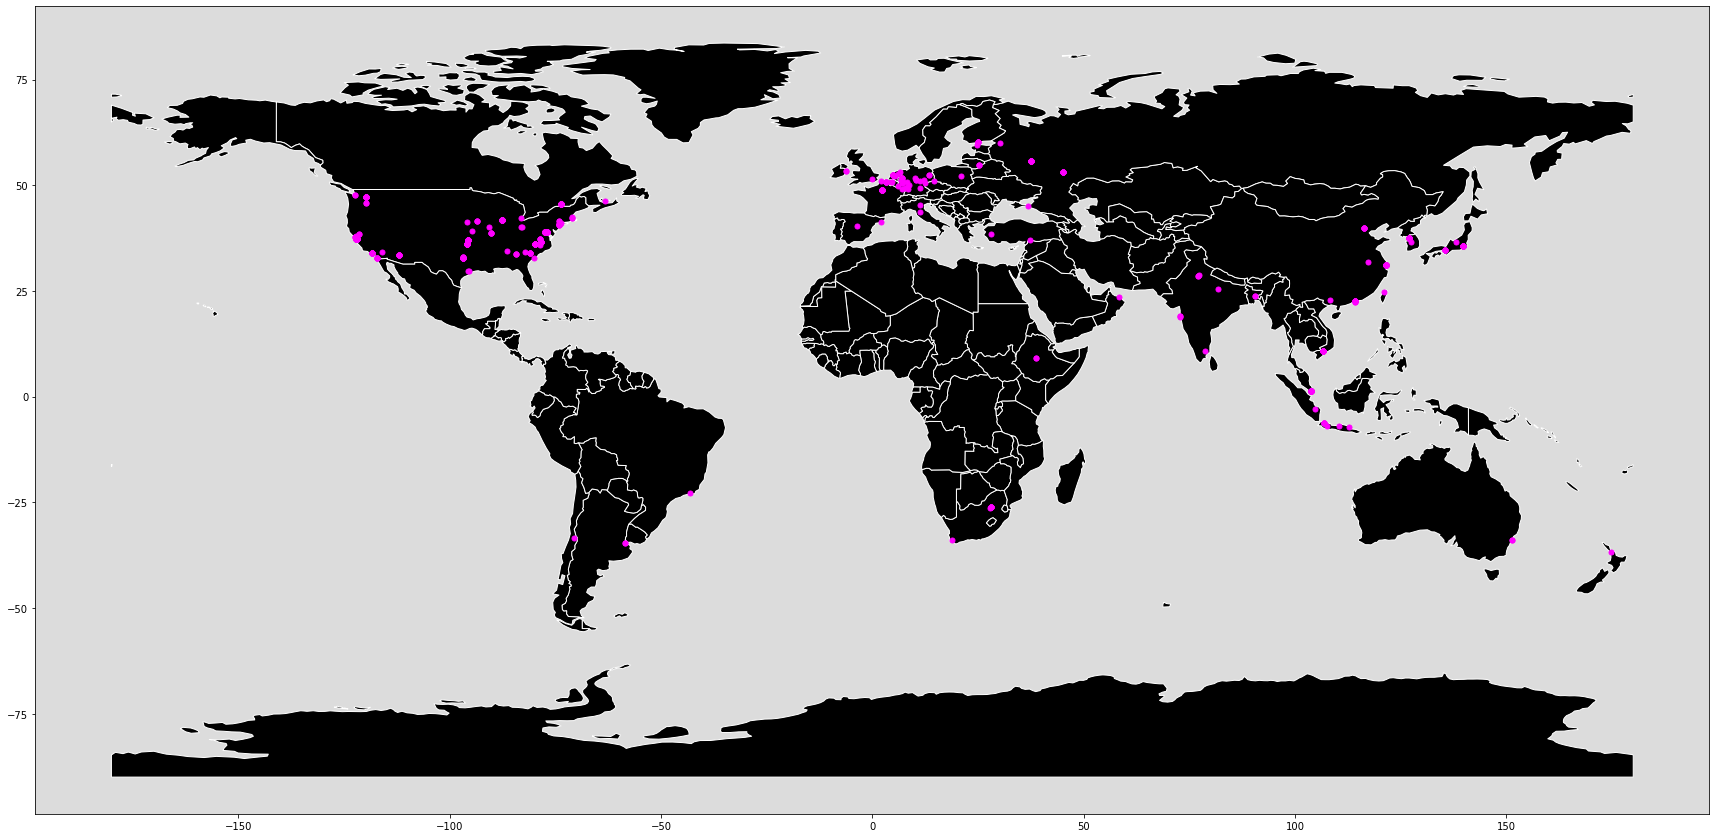

614


In [45]:
# Draw Map
geometry = [Point(xy) for xy in zip(ip_to_location['lng'], ip_to_location['lat'])]
gdf = GeoDataFrame(ip_to_location, geometry=geometry)   

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
fig, ax = plt.subplots(figsize = (30, 20))
ax.set_facecolor('gainsboro')
ax.set_aspect('equal')
world.plot(ax = ax, color='black', edgecolor='white')
gdf.plot(ax=ax, marker='o', markersize=25, color = 'magenta')
plt.show()

print(len(gdf))

In [15]:
ip_to_location['full_country'] = [pycountry.countries.get(alpha_2=str(country)).name for country in ip_to_location['Country']]

In [27]:
ip_to_location

,ip,location,lat,lng,City,State/Region,Country,geometry
0,40.77.167.99,"Boydton, Virginia, US",36.6676,-78.3875,Boydton,Virginia,US,POINT (-78.38750 36.66760)
1,40.77.167.67,"Boydton, Virginia, US",36.6676,-78.3875,Boydton,Virginia,US,POINT (-78.38750 36.66760)
2,84.88.186.196,"Barcelona, Catalonia, ES",41.3888,2.1590,Barcelona,Catalonia,ES,POINT (2.15900 41.38880)
3,52.43.50.21,"Boardman, Oregon, US",45.8399,-119.7006,Boardman,Oregon,US,POINT (-119.70060 45.83990)
4,145.255.74.252,"Muscat, Muscat, OM",23.5841,58.4078,Muscat,Muscat,OM,POINT (58.40780 23.58410)
...,...,...,...,...,...,...,...,...
609,120.235.173.52,"Shenzhen, Guangdong, CN",22.5455,114.0683,Shenzhen,Guangdong,CN,POINT (114.06830 22.54550)
610,51.158.108.61,"Paris, Île-de-France, FR",48.8534,2.3488,Paris,Île-de-France,FR,POINT (2.34880 48.85340)
611,17.121.112.23,"Dearing, Kansas, US",37.0587,-95.7133,Dearing,Kansas,US,POINT (-95.71330 37.05870)
612,207.244.224.209,"St. Louis, Missouri, US",38.6273,-90.1979,St. Louis,Missouri,US,POINT (-90.19790 38.62730)


In [16]:
def country_to_continent(country_name):
    country_alpha2 = pc.country_name_to_country_alpha2(country_name)
    country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
    country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
    return country_continent_name

In [17]:
ip_to_location['Continent'] = [country_to_continent(country) for country in ip_to_location['full_country']]

In [18]:
ip_to_location.to_csv('/home/kin672/gentb-summer22/Geography/ip_to_location_EXTENDED.csv', index = False)

In [19]:
res_and_lineage = pd.read_csv('/home/kin672/gentb-summer22/Creating Summaries from Relevant Files/7-18 Output/full_df_7-18.csv')
res_and_lineage

,Unnamed: 0,ID,Drug,Resistant,Lineage
0,14639,rename_mycobacterium_tuberculosis_m1418.0.vari...,rif,0,1
1,62297,1733.9086_res,rif,1,1.1
2,62258,1733.8986_res,rif,1,1.1.1
3,62986,1733.8968_res,rif,1,1.1.1
4,64741,1733.8960_res,rif,1,1.1.1
...,...,...,...,...,...
105620,65187,1_S1_L001_R1_001.sorted,eth,0,NaN
105621,65200,1_S1_L001_R2_001.sorted,eth,0,NaN
105622,86988,KL004,eth,0,NaN
105623,91447,IDR1400002533,eth,0,NaN


In [20]:
isolate_to_location['Lineage'] = [res_and_lineage.loc[(res_and_lineage.ID == isolate) & (res_and_lineage.Drug == 'rif'), 'Lineage'].values[0] for isolate in isolate_to_location.Isolate]
for drug in res_and_lineage.Drug.unique():
    isolate_to_location[drug] = [res_and_lineage.loc[(res_and_lineage.ID == isolate) & (res_and_lineage.Drug == drug), 'Resistant'].values[0] for isolate in isolate_to_location.Isolate]

In [21]:
def main_lineage_from_lineage(lineage):
    if ',' in lineage:
        return('Multiple')
    return(lineage[0:1])

isolate_to_location['Main Lineage'] = [main_lineage_from_lineage(lineage) for lineage in isolate_to_location.Lineage]

In [22]:
isolate_to_location

,Isolate,Location,Latitude,Longitude,City,State/Region,Country,Continent,Lineage,rif,...,str,cap,amk,cip,kan,levo,oflx,pas,eth,Main Lineage
0,snps.filt,"Leipzig, Saxony, DE",51.3566,12.2643,Leipzig,Saxony,Germany,Europe,4.2.1.1.1.1.1.1.i2,0,...,0,0,0,0,0,0,0,0,0,4
1,MFS-30_lib45960,"Stellenbosch, Western Cape, ZA",-33.9346,18.8668,Stellenbosch,Western Cape,South Africa,Africa,2.2.1.1.1,0,...,0,0,0,0,0,0,0,0,0,2
2,MFS-27_lib45957,"Stellenbosch, Western Cape, ZA",-33.9346,18.8668,Stellenbosch,Western Cape,South Africa,Africa,4.2.1.1.1.1.1.1.i1,0,...,0,0,0,0,0,0,0,0,0,4
3,MFS-117_lib47296,"Stellenbosch, Western Cape, ZA",-33.9346,18.8668,Stellenbosch,Western Cape,South Africa,Africa,4.2.1.1.1.1.1.1.i1,0,...,0,0,0,0,0,0,0,0,0,4
4,MFS-171_lib47350,"Stellenbosch, Western Cape, ZA",-33.9346,18.8668,Stellenbosch,Western Cape,South Africa,Africa,4.1.i1.2.1,0,...,0,0,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,S0028_01_fastp,"Stellenbosch, Western Cape, ZA",-33.9346,18.8668,Stellenbosch,Western Cape,South Africa,Africa,"2.2.1.1.1,4.2.1.2.1.1",0,...,0,0,0,0,0,0,0,0,0,Multiple
120,S0008_01_fastp,"Stellenbosch, Western Cape, ZA",-33.9346,18.8668,Stellenbosch,Western Cape,South Africa,Africa,2.2.1.1.1,0,...,1,1,0,0,0,0,0,0,0,2
121,S0021_01_fastp,"Stellenbosch, Western Cape, ZA",-33.9346,18.8668,Stellenbosch,Western Cape,South Africa,Africa,4.2.1.2.1.1.i1,0,...,0,0,0,0,0,0,0,0,0,4
122,S0024_01_fastp,"Stellenbosch, Western Cape, ZA",-33.9346,18.8668,Stellenbosch,Western Cape,South Africa,Africa,4.1.i1.2.1,0,...,1,0,0,0,0,0,0,0,0,4


In [23]:
# Draw Map 2
geometry = [Point(xy) for xy in zip(isolate_to_location['Longitude'], isolate_to_location['Latitude'])]
gdf = GeoDataFrame(isolate_to_location, geometry=geometry)   

In [27]:
gdf

,Isolate,Location,Latitude,Longitude,City,State/Region,Country,Continent,Lineage,rif,...,amk,cip,kan,levo,oflx,pas,eth,Main Lineage,geometry,color
0,snps.filt,"Leipzig, Saxony, DE",51.3566,12.2643,Leipzig,Saxony,Germany,Europe,4.2.1.1.1.1.1.1.i2,0,...,0,0,0,0,0,0,0,4,POINT (12.26430 51.35660),green
1,MFS-30_lib45960,"Stellenbosch, Western Cape, ZA",-33.9346,18.8668,Stellenbosch,Western Cape,South Africa,Africa,2.2.1.1.1,0,...,0,0,0,0,0,0,0,2,POINT (18.86680 -33.93460),blue
2,MFS-27_lib45957,"Stellenbosch, Western Cape, ZA",-33.9346,18.8668,Stellenbosch,Western Cape,South Africa,Africa,4.2.1.1.1.1.1.1.i1,0,...,0,0,0,0,0,0,0,4,POINT (18.86680 -33.93460),green
3,MFS-117_lib47296,"Stellenbosch, Western Cape, ZA",-33.9346,18.8668,Stellenbosch,Western Cape,South Africa,Africa,4.2.1.1.1.1.1.1.i1,0,...,0,0,0,0,0,0,0,4,POINT (18.86680 -33.93460),green
4,MFS-171_lib47350,"Stellenbosch, Western Cape, ZA",-33.9346,18.8668,Stellenbosch,Western Cape,South Africa,Africa,4.1.i1.2.1,0,...,0,0,0,0,0,0,0,4,POINT (18.86680 -33.93460),green
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,S0028_01_fastp,"Stellenbosch, Western Cape, ZA",-33.9346,18.8668,Stellenbosch,Western Cape,South Africa,Africa,"2.2.1.1.1,4.2.1.2.1.1",0,...,0,0,0,0,0,0,0,Multiple,POINT (18.86680 -33.93460),black
120,S0008_01_fastp,"Stellenbosch, Western Cape, ZA",-33.9346,18.8668,Stellenbosch,Western Cape,South Africa,Africa,2.2.1.1.1,0,...,0,0,0,0,0,0,0,2,POINT (18.86680 -33.93460),blue
121,S0021_01_fastp,"Stellenbosch, Western Cape, ZA",-33.9346,18.8668,Stellenbosch,Western Cape,South Africa,Africa,4.2.1.2.1.1.i1,0,...,0,0,0,0,0,0,0,4,POINT (18.86680 -33.93460),green
122,S0024_01_fastp,"Stellenbosch, Western Cape, ZA",-33.9346,18.8668,Stellenbosch,Western Cape,South Africa,Africa,4.1.i1.2.1,0,...,0,0,0,0,0,0,0,4,POINT (18.86680 -33.93460),green


In [35]:
gdf.groupby(['Location','Main Lineage']).count()

Isolate  Latitude  Longitude  \
Location                       Main Lineage                                 
Allahābād, Uttar Pradesh, IN   1                   1         1          1   
                               2                  65        65         65   
                               3                   7         7          7   
                               4                  26        26         26   
                               Multiple            1         1          1   
Delhi, Delhi, IN               2                   1         1          1   
Jakarta, Jakarta, ID           1                   1         1          1   
Leipzig, Saxony, DE            4                   1         1          1   
Leuven, Flanders, BE           4                   1         1          1   
Muscat, Muscat, OM             1                   2         2          2   
                               3                   3         3          3   
                               4                   2         2          2   
Stellenbosch, Western Cape, ZA 2                   3         3          3   
                               3                   1         1          1   
                               4                   8         8          8   
                               Multiple            1         1          1   

                                             City  State/Region  Country  \
Location                       Main Lineage                                
Allahābād, Uttar Pradesh, IN   1                1             1        1   
                               2               65            65       65   
                               3                7             7        7   
                               4               26            26       26   
                               Multiple         1             1        1   
Delhi, Delhi, IN               2                1             1        1   
Jakarta, Jakarta, ID           1                1             1        1   
Leipzig, Saxony, DE            4                1             1        1   
Leuven, Flanders, BE           4                1             1        1   
Muscat, Muscat, OM             1                2             2        2   
                               3                3             3        3   
                               4                2             2        2   
Stellenbosch, Western Cape, ZA 2                3             3        3   
                               3                1             1        1   
                               4                8             8        8   
                               Multiple         1             1        1   

                                             Continent  Lineage  rif  inh  \
Location                       Main Lineage                                 
Allahābād, Uttar Pradesh, IN   1                     1        1    1    1   
                               2                    65       65   65   65   
                               3                     7        7    7    7   
                               4                    26       26   26   26   
                               Multiple              1        1    1    1   
Delhi, Delhi, IN               2                     1        1    1    1   
Jakarta, Jakarta, ID           1                     1        1    1    1   
Leipzig, Saxony, DE            4                     1        1    1    1   
Leuven, Flanders, BE           4                     1        1    1    1   
Muscat, Muscat, OM             1                     2        2    2    2   
                               3                     3        3    3    3   
                               4                     2        2    2    2   
Stellenbosch, Western Cape, ZA 2                     3        3    3    3   
                               3                     1        1    1    1   
                               4                     8   

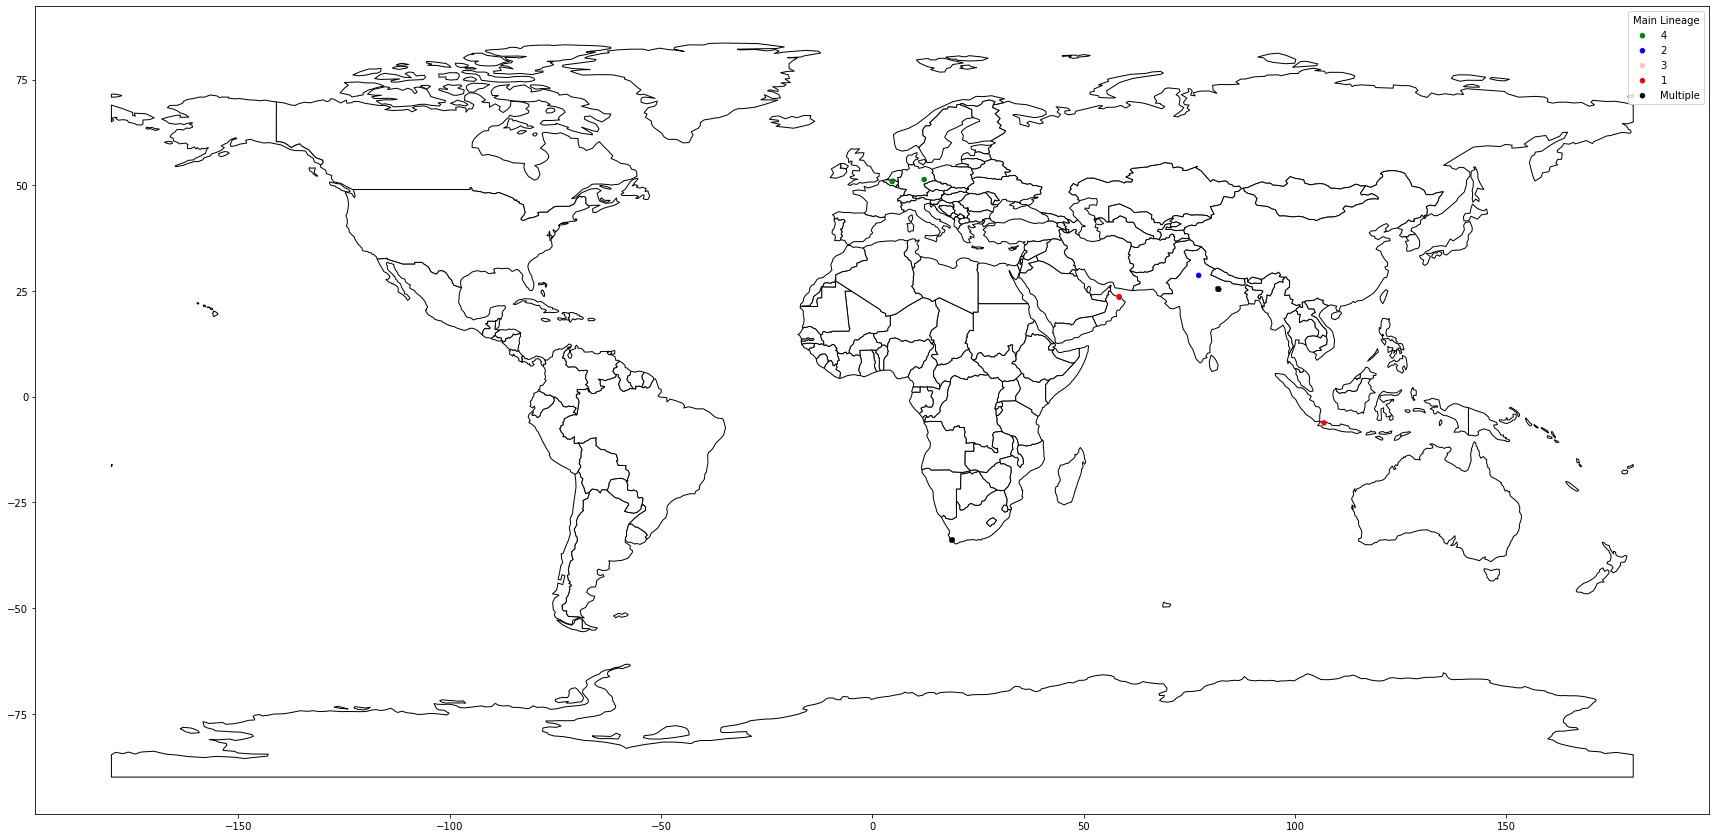

124


In [26]:
fig, ax = plt.subplots(figsize = (30, 20))
ax.set_aspect('equal')
world.plot(ax = ax, color='white', edgecolor='black')
colors = {'1': 'red', '2': 'blue', '3': 'pink', '4': 'green', 'Multiple': 'black'}
gdf['color'] = [colors[lineage] for lineage in gdf['Main Lineage']]
for main_lineage in gdf['Main Lineage'].unique():
    gdf_temp = gdf.loc[gdf['Main Lineage'] == main_lineage, :]
    gdf_temp.plot(ax=ax, marker='o', c = gdf_temp.color, label = main_lineage, markersize=20)
ax.legend(title = 'Main Lineage')
plt.show()

print(len(gdf))